In [18]:
import os
from dotenv import load_dotenv
load_dotenv()

# Graphdb configuration
os.environ["LANGCHAIN_API_KEY"]=os.getenv('LANGCHAIN_API_KEY')
os.environ["LANGCHAIN_TRACING_V2"]="true"
os.environ["LANGCHAIN_PROJECT"]="LangGraphDemo"
os.environ["GROQ_API_KEY"]=os.getenv('GROQ_API_KEY')

In [19]:
from langchain_groq import ChatGroq
llm = ChatGroq(model="gemma2-9b-it")

In [20]:
llm

ChatGroq(client=<groq.resources.chat.completions.Completions object at 0x7fc67cb08da0>, async_client=<groq.resources.chat.completions.AsyncCompletions object at 0x7fc67cb0b020>, model_name='gemma2-9b-it', groq_api_key=SecretStr('**********'))

In [21]:
## Chabot using LangGrpah


In [22]:
from typing import Annotated
from typing_extensions import TypedDict
from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import add_messages


In [23]:
class State(TypedDict):
    # Messages have the type "list". The `add_messages` function
    # in the annotation defines how this state key should be updated
    # (in this case, it appends messages to the list, rather than overwriting them)
  messages:Annotated[list,add_messages]

graph_builder=StateGraph(State)

In [24]:
graph_builder

In [25]:
def chatbot(state:State):
    return {"messages":llm.invoke(state['messages'])}

In [26]:
graph_builder.add_node("chatbot",chatbot)

In [27]:
graph_builder

In [28]:
graph_builder.add_edge(START,"chatbot")
graph_builder.add_edge("chatbot",END)

In [29]:
graph=graph_builder.compile()

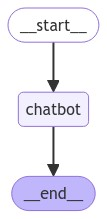

In [30]:
from IPython.display import Image, display
try:
  display(Image(graph.get_graph().draw_mermaid_png()))
except Exception:
  pass

In [31]:
while True:
  user_input=input("User: ")
  if user_input.lower() in ["quit","q"]:
    print("Good Bye")
    break
  for event in graph.stream({'messages':("user",user_input)}):
    # print(event.values())
    for value in event.values():
      # print(value['messages'])
      print("Assistant:",value["messages"].content)

Assistant: Hello! 👋 

What can I do for you today?  😊

Assistant: ## The History of the Taj Mahal: A Monument to Love and Loss

The Taj Mahal, an ivory-white marble mausoleum on the south bank of the Yamuna river in Agra, India, is arguably the world's most famous building. Its story is one of love, grief, and architectural brilliance.

**The Love Story:**

Mughal emperor Shah Jahan commissioned the Taj Mahal in 1632 as a mausoleum for his beloved wife Mumtaz Mahal, who died during childbirth in 1631. Their love story is legendary, filled with tales of devotion and sacrifice.

Mumtaz Mahal, born Arjumand Banu Begum, was Shah Jahan's favorite wife among his numerous consorts. She played a significant role in his life, acting as his advisor and confidante.

**Construction:**

The construction of the Taj Mahal was a monumental undertaking, lasting over 20 years and involving thousands of artisans and laborers.  

* **Materials:**  The finest materials from across the Mughal Empire were us